# SETUP

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Perceptron

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [5]:
y_pred

array([1])

Saving figure perceptron_iris_plot


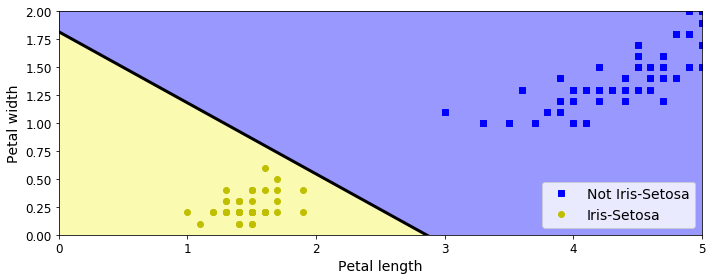

In [6]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [7]:
def sigmoid(z):
    return 1/ (1+ np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)


# Building Image Classifier

In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [10]:
X_train_full.shape

(60000, 28, 28)

In [11]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

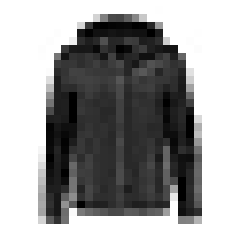

4

In [15]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()
y_train[0]

In [16]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [17]:
class_names[y_train[0]]

'Coat'

Saving figure fashion_mnist_plot


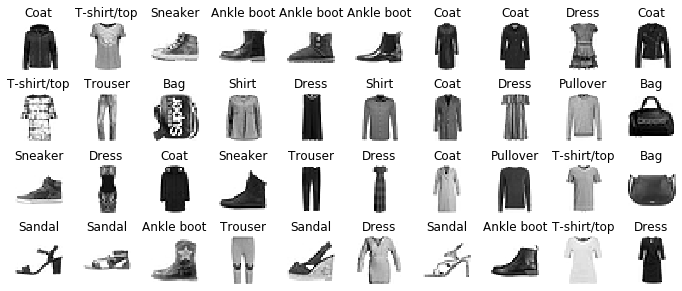

In [18]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [20]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [21]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [22]:
model.layers

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [28]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [31]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [32]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [33]:
weights.shape

(784, 300)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [36]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4393 - accuracy: 0.8454 - val_loss: 0.5341 - val_accuracy: 0.7988
Epoch 4/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4126 - accuracy: 0.8565 - val_loss: 0.3915 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3940 - accuracy: 0.8618 - val_loss: 0.3748 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3753 - accuracy: 0.8677 - val_loss: 0.3707 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3633 - accuracy: 0.8715 - val_loss: 0.3623 - val_ac

In [37]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


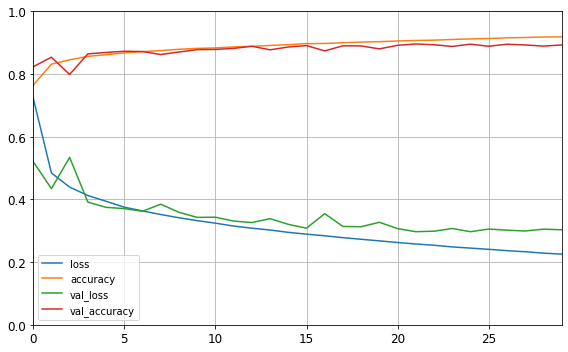

In [39]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [40]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3377 - accuracy: 0.8827


[0.33773478865623474, 0.8827000260353088]

In [41]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [42]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [43]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [44]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


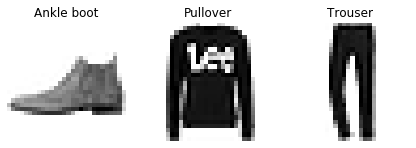

In [45]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

## Regression MLP

In [46]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [47]:
np.random.seed(42)
tf.random.set_seed(42)

In [48]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4875 - val_loss: 0.4656

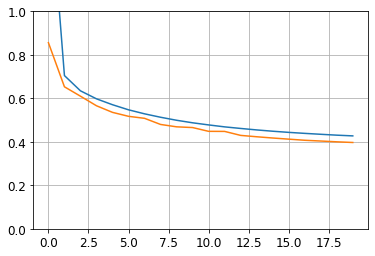

In [49]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [50]:
y_pred

array([[0.38856643],
       [1.6792021 ],
       [3.1022797 ]], dtype=float32)

# Functional API (Wide and deep neural Network)

In [51]:
np.random.seed(42)
tf.random.set_seed(42)

In [52]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [53]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [54]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4659 - val_loss: 0.4313

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [55]:
np.random.seed(42)
tf.random.set_seed(42)

In [56]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [57]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 6ms/step - loss: 1.8145 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 0.6771 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5979 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5584 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5334 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5120 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4970 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4843 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4730 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4644 - val_loss: 0.4315

In [58]:
np.random.seed(42)
tf.random.set_seed(42)

In [59]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [60]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [61]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 6ms/step - loss: 2.1365 - main_output_loss: 1.9196 - aux_output_loss: 4.0890 - val_loss: 1.6233 - val_main_output_loss: 0.8468 - val_aux_output_loss: 8.6117
Epoch 2/20
363/363 [==============================] - 3s 8ms/step - loss: 0.8905 - main_output_loss: 0.6969 - aux_output_loss: 2.6326 - val_loss: 1.5163 - val_main_output_loss: 0.6836 - val_aux_output_loss: 9.0109
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7429 - main_output_loss: 0.6088 - aux_output_loss: 1.9499 - val_loss: 1.4639 - val_main_output_loss: 0.6229 - val_aux_output_loss: 9.0326
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6771 - main_output_loss: 0.5691 - aux_output_loss: 1.6485 - val_loss: 1.3388 - val_main_output_loss: 0.5481 - val_aux_output_loss: 8.4552
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: 0.6381 - main_output_loss: 0.5434 - aux_output_loss: 1.4911 - val_loss

In [62]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 1s 4ms/step - loss: 0.4668 - main_output_loss: 0.4178 - aux_output_loss: 0.9082


## Subclassing API

In [63]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [64]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 2s 6ms/step - loss: 2.3298 - output_1_loss: 2.2186 - output_2_loss: 3.3304 - val_loss: 2.1435 - val_output_1_loss: 1.1581 - val_output_2_loss: 11.0117
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 0.9714 - output_1_loss: 0.8543 - output_2_loss: 2.0252 - val_loss: 1.7567 - val_output_1_loss: 0.8205 - val_output_2_loss: 10.1825
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.8268 - output_1_loss: 0.7289 - output_2_loss: 1.7082 - val_loss: 1.5664 - val_output_1_loss: 0.7913 - val_output_2_loss: 8.5419
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 0.7636 - output_1_loss: 0.6764 - output_2_loss: 1.5477 - val_loss: 1.3088 - val_output_1_loss: 0.6549 - val_output_2_loss: 7.1933
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.7211 - output_1_loss: 0.6402 - output_2_loss: 1.4489 - val_loss: 1.1357 - val_output_1_loss: 0.5964 - val_

In [65]:
model = WideAndDeepModel(30, activation="relu")

## Saving and restoring model

In [66]:
np.random.seed(42)
tf.random.set_seed(42)

In [67]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [68]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 2s 4ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 2s 4ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 1s 4ms/step - loss: 0.4382


In [69]:
model.save("my_keras_model.h5")

In [70]:
model = keras.models.load_model("my_keras_model.h5")

In [71]:
model.predict(X_new)

array([[0.5400236],
       [1.6505971],
       [3.0098243]], dtype=float32)

In [72]:
model.save_weights("my_keras_weights.ckpt")

In [73]:
model.load_weights("my_keras_weights.ckpt")

# Callbacks



In [75]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [76]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
]) 

In [78]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 5ms/step - loss: 1.8542 - val_loss: 1.3779
Epoch 2/10
363/363 [==============================] - 2s 4ms/step - loss: 0.7854 - val_loss: 0.6885
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6817 - val_loss: 0.6645
Epoch 4/10
363/363 [==============================] - 2s 4ms/step - loss: 0.6283 - val_loss: 0.5944
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5868 - val_loss: 0.5505
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5510 - val_loss: 0.5211
Epoch 7/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5225 - val_loss: 0.5055
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4993 - val_loss: 0.4648
Epoch 9/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4803 - val_loss: 0.4442
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4472


In [79]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4527 - val_loss: 0.4177
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4426 - val_loss: 0.4139
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4341 - val_loss: 0.4064
Epoch 4/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4268 - val_loss: 0.4054
Epoch 5/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4209 - val_loss: 0.3944
Epoch 6/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4154 - val_loss: 0.3992
Epoch 7/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4108 - val_loss: 0.3923
Epoch 8/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4069 - val_loss: 0.3835
Epoch 9/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4032 - val_loss: 0.3893
Epoch 10/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4000 - val_lo

In [80]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [81]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

361/363 [============================>.] - ETA: 0s - loss: 0.3941
val/train: 0.99
363/363 [==============================] - 2s 5ms/step - loss: 0.3946 - val_loss: 0.3890


# Tensorboard

In [82]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [83]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2020_06_16-17_17_52'

In [84]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [85]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [86]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 4s 10ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 2s 6ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 2s 5ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 2s 5ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 2s 4ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 2s 4ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 2s 4ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 2s 6ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 2s 6ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4474 - val_loss: 0.437

In [87]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 7472), started 0:02:29 ago. (Use '!kill 7472' to kill it.)

In [88]:
run_logdir2 = get_run_logdir()
run_logdir2


'.\\my_logs\\run_2020_06_16-17_23_42'

In [89]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [90]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [91]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 4s 10ms/step - loss: 0.5530 - val_loss: 302.8536
Epoch 2/30
363/363 [==============================] - 2s 7ms/step - loss: 5292745216.0000 - val_loss: 1.3230
Epoch 3/30
363/363 [==============================] - 2s 6ms/step - loss: 1.3411 - val_loss: 1.3176
Epoch 4/30
363/363 [==============================] - 2s 7ms/step - loss: 1.3423 - val_loss: 1.3261
Epoch 5/30
363/363 [==============================] - 3s 7ms/step - loss: 1.3423 - val_loss: 1.3154
Epoch 6/30
363/363 [==============================] - 2s 5ms/step - loss: 1.3431 - val_loss: 1.3203
Epoch 7/30
363/363 [==============================] - 3s 7ms/step - loss: 1.3425 - val_loss: 1.3149
Epoch 8/30
363/363 [==============================] - 2s 6ms/step - loss: 1.3433 - val_loss: 1.3157
Epoch 9/30
363/363 [==============================] - 2s 6ms/step - loss: 1.3435 - val_loss: 1.3150
Epoch 10/30
363/363 [==============================] - 2s 6ms/step - loss: 1.3423 - val_

# Hyperparameter Tuning

In [92]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [93]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [94]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [95]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 1.0896 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 0.7606 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5456 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4732 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4503 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4338 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4241 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 2s 6ms/step - loss: 0.4168 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4108 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 2s 6ms/step - loss: 0.4060 - val_l

363/363 [==============================] - 2s 5ms/step - loss: 0.3383 - val_loss: 0.3432
Epoch 82/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3371 - val_loss: 0.3211
Epoch 83/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3367 - val_loss: 0.3342
Epoch 84/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3362 - val_loss: 0.4136
Epoch 85/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3369 - val_loss: 0.3285
Epoch 86/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3359 - val_loss: 0.3440
Epoch 87/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3357 - val_loss: 0.3733
Epoch 88/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3355 - val_loss: 0.3188
Epoch 89/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3346 - val_loss: 0.3492
Epoch 90/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3348 - val_loss: 

In [96]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.3409


In [97]:
y_pred = keras_reg.predict(X_new)

In [98]:
np.random.seed(42)
tf.random.set_seed(42)

In [99]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


242/242 [==============================] - 2s 6ms/step - loss: 3.5557 - val_loss: 1.8752
Epoch 2/100
242/242 [==============================] - 1s 6ms/step - loss: 1.3347 - val_loss: 0.9522
Epoch 3/100
242/242 [==============================] - 1s 6ms/step - loss: 0.8591 - val_loss: 0.7820
Epoch 4/100
242/242 [==============================] - 1s 6ms/step - loss: 0.7360 - val_loss: 0.7249
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6930 - val_loss: 0.6994
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6668 - val_loss: 0.9118
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6514 - val_loss: 0.8495
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6381 - val_loss: 0.8605
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6276 - val_loss: 0.6524
Epoch 10/100
242/242 [==============================] - 1s 6ms/step - loss: 0.6125 - val_loss: 0.8619
E

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s


242/242 [==============================] - 2s 6ms/step - loss: 3.5605 - val_loss: 23.0855
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 1.4777 - val_loss: 10.8387
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 1.0149 - val_loss: 4.4392
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 0.8729 - val_loss: 1.5338
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 0.8027 - val_loss: 0.7192
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7542 - val_loss: 1.2046
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7160 - val_loss: 2.4524
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6847 - val_loss: 4.1421
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6588 - val_loss: 5.9820
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6371 - val_loss: 7.7654

242/242 [==============================] - 1s 4ms/step - loss: 1.6846 - val_loss: 282.6048
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 2.5718 - val_loss: 656.3251
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 12.3829 - val_loss: 1380.0117
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 14.8443 - val_loss: 2817.4534
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 7.4320 - val_loss: 4499.3799
Epoch 11/100
121/121 [==============================] - 0s 2ms/step - loss: 11.0521
[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=  12.8s
[CV] learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87 ...
Epoch 1/100
242/242 [==============================] - 1s 5ms/step - loss: 2.5089 - val_loss: 2.6033
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 1.0793 - val_loss: 1.0424
Epoch 3/100
242/242 [==============================]

242/242 [==============================] - 1s 6ms/step - loss: 0.4612 - val_loss: 0.5264
Epoch 19/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4549 - val_loss: 0.4894
Epoch 20/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4493 - val_loss: 0.4711
Epoch 21/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4442 - val_loss: 0.4525
Epoch 22/100
242/242 [==============================] - 2s 6ms/step - loss: 0.4395 - val_loss: 0.4467
Epoch 23/100
242/242 [==============================] - 2s 7ms/step - loss: 0.4352 - val_loss: 0.4404
Epoch 24/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4313 - val_loss: 0.4333
Epoch 25/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4276 - val_loss: 0.4302
Epoch 26/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4242 - val_loss: 0.4284
Epoch 27/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4209 - val_loss: 

242/242 [==============================] - 1s 4ms/step - loss: 0.3800 - val_loss: 0.4177
Epoch 59/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3789 - val_loss: 0.4166
Epoch 60/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3779 - val_loss: 0.3910
Epoch 61/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3772 - val_loss: 0.4094
Epoch 62/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3763 - val_loss: 0.4363
Epoch 63/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3757 - val_loss: 0.4025
Epoch 64/100
121/121 [==============================] - 0s 3ms/step - loss: 0.3737
[CV]  learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87, total= 1.3min
[CV] learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24 ...
Epoch 1/100
242/242 [==============================] - 1s 5ms/step - loss: 2.4720 - val_loss: 7.9722
Epoch 2/100
242/242 [==============================] - 1s 4ms/s

Epoch 1/100
242/242 [==============================] - 1s 5ms/step - loss: 3.7641 - val_loss: 28.0492
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 2.0504 - val_loss: 43.0472
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 1.6124 - val_loss: 37.0128
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 1.3603 - val_loss: 28.7538
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 1.1689 - val_loss: 20.6120
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 1.0259 - val_loss: 14.6245
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.9261 - val_loss: 10.5960
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.8594 - val_loss: 7.2861
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.8137 - val_loss: 5.1836
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7810 -

242/242 [==============================] - 1s 4ms/step - loss: 0.4336 - val_loss: 0.4532
Epoch 50/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4322 - val_loss: 0.4549
Epoch 51/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4307 - val_loss: 0.4534
Epoch 52/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4295 - val_loss: 0.4594
Epoch 53/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4281 - val_loss: 0.4535
Epoch 54/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4269 - val_loss: 0.4484
Epoch 55/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4255 - val_loss: 0.4489
Epoch 56/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4244 - val_loss: 0.4465
Epoch 57/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4232 - val_loss: 0.4489
Epoch 58/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4221 - val_loss: 

Epoch 1/100
242/242 [==============================] - 1s 5ms/step - loss: 2.0333 - val_loss: 13.7380
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6240 - val_loss: 10.0594
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7131 - val_loss: 41.2693
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 1.1121 - val_loss: 74.9048
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.9784 - val_loss: 205.5686
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 1.9726 - val_loss: 246.7374
Epoch 7/100
242/242 [==============================] - 1s 5ms/step - loss: 2.5115 - val_loss: 388.8352
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 5.9673 - val_loss: 620.5344
Epoch 9/100
242/242 [==============================] - 1s 5ms/step - loss: 6.9990 - val_loss: 919.7242
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 4

242/242 [==============================] - 1s 5ms/step - loss: 0.3754 - val_loss: 0.3620
Epoch 19/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3701 - val_loss: 0.4285
Epoch 20/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3671 - val_loss: 0.3458
Epoch 21/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3714 - val_loss: 0.3817
Epoch 22/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3679 - val_loss: 0.3408
Epoch 23/100
242/242 [==============================] - 2s 7ms/step - loss: 0.3623 - val_loss: 0.3550
Epoch 24/100
242/242 [==============================] - 2s 9ms/step - loss: 0.3606 - val_loss: 0.4301
Epoch 25/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3602 - val_loss: 0.3363
Epoch 26/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3578 - val_loss: 0.3482
Epoch 27/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3590 - val_loss: 

242/242 [==============================] - 1s 4ms/step - loss: 0.3194 - val_loss: 0.3789
Epoch 99/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3283 - val_loss: 0.4178
Epoch 100/100
121/121 [==============================] - 0s 2ms/step - loss: 0.3168
[CV]  learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38, total= 1.9min
[CV] learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21 ..
Epoch 1/100
242/242 [==============================] - 1s 5ms/step - loss: 4.0446 - val_loss: 7.0502
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 2.3108 - val_loss: 7.2037
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 1.6259 - val_loss: 5.5884
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 1.3383 - val_loss: 3.7640
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 1.1769 - val_loss: 2.5552
Epoch 6/100
242/242 [==============================] - 1s 4ms/step 

242/242 [==============================] - 1s 6ms/step - loss: 0.4172 - val_loss: 0.4071
Epoch 77/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4157 - val_loss: 0.4048
Epoch 78/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4140 - val_loss: 0.4032
Epoch 79/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4125 - val_loss: 0.4017
Epoch 80/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4108 - val_loss: 0.4002
Epoch 81/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4094 - val_loss: 0.3986
Epoch 82/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4079 - val_loss: 0.3973
Epoch 83/100
242/242 [==============================] - 1s 6ms/step - loss: 0.4065 - val_loss: 0.3959
Epoch 84/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4051 - val_loss: 0.3949
Epoch 85/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4037 - val_loss: 

242/242 [==============================] - 1s 5ms/step - loss: 0.5360 - val_loss: 0.5049
Epoch 27/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5296 - val_loss: 0.4989
Epoch 28/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5234 - val_loss: 0.4930
Epoch 29/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5173 - val_loss: 0.4880
Epoch 30/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5115 - val_loss: 0.4819
Epoch 31/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5058 - val_loss: 0.4768
Epoch 32/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5003 - val_loss: 0.4726
Epoch 33/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4951 - val_loss: 0.4680
Epoch 34/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4901 - val_loss: 0.4647
Epoch 35/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4854 - val_loss: 

242/242 [==============================] - 2s 7ms/step - loss: 0.3703 - val_loss: 0.3798
Epoch 48/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3705 - val_loss: 0.3800
Epoch 49/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3686 - val_loss: 0.3783
Epoch 50/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3686 - val_loss: 0.3797
Epoch 51/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3683 - val_loss: 0.3820
Epoch 52/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3675 - val_loss: 0.3765
Epoch 53/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3672 - val_loss: 0.3772
Epoch 54/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3667 - val_loss: 0.3766
Epoch 55/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3656 - val_loss: 0.3773
Epoch 56/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3663 - val_loss: 

242/242 [==============================] - 1s 4ms/step - loss: 0.5287 - val_loss: 0.5968
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4829 - val_loss: 0.4855
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4636 - val_loss: 0.4448
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4508 - val_loss: 0.4217
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4424 - val_loss: 0.4094
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4358 - val_loss: 0.4025
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4322 - val_loss: 0.3958
Epoch 11/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4267 - val_loss: 0.3918
Epoch 12/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4230 - val_loss: 0.3892
Epoch 13/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4196 - val_loss: 0.391

Epoch 11/100
242/242 [==============================] - 1s 4ms/step - loss: 0.8894 - val_loss: 0.9739
Epoch 12/100
242/242 [==============================] - 1s 4ms/step - loss: 0.8312 - val_loss: 0.9570
Epoch 13/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7875 - val_loss: 0.9426
Epoch 14/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7545 - val_loss: 0.9414
Epoch 15/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7294 - val_loss: 0.9351
Epoch 16/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7100 - val_loss: 0.9457
Epoch 17/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6951 - val_loss: 0.9437
Epoch 18/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6832 - val_loss: 0.9404
Epoch 19/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6737 - val_loss: 0.9554
Epoch 20/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6661

242/242 [==============================] - 1s 5ms/step - loss: 0.3101 - val_loss: 0.3329
Epoch 65/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3093 - val_loss: 0.3244
Epoch 66/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3094 - val_loss: 0.3059
Epoch 67/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3086 - val_loss: 0.3231
Epoch 68/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3078 - val_loss: 0.3250
Epoch 69/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3069 - val_loss: 0.3158
Epoch 70/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3069 - val_loss: 0.3114
Epoch 71/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3058 - val_loss: 0.3195
Epoch 72/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3052 - val_loss: 0.3120
Epoch 73/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3045 - val_loss: 

242/242 [==============================] - 1s 4ms/step - loss: 0.3590 - val_loss: 0.3928
Epoch 23/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3572 - val_loss: 0.3411
Epoch 24/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3572 - val_loss: 0.4823
Epoch 25/100
242/242 [==============================] - 2s 7ms/step - loss: 0.3555 - val_loss: 0.3589
Epoch 26/100
242/242 [==============================] - 2s 6ms/step - loss: 0.3527 - val_loss: 0.3810
Epoch 27/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3504 - val_loss: 0.4593
Epoch 28/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3500 - val_loss: 0.3360
Epoch 29/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3499 - val_loss: 0.4983
Epoch 30/100
242/242 [==============================] - 1s 5ms/step - loss: 0.3480 - val_loss: 0.3747
Epoch 31/100
242/242 [==============================] - 1s 6ms/step - loss: 0.3470 - val_loss: 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 23.2min finished


363/363 [==============================] - 1s 4ms/step - loss: 0.9562 - val_loss: 7.9910
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 0.6345 - val_loss: 4.4949
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5106 - val_loss: 0.4376
Epoch 4/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4426 - val_loss: 0.4602
Epoch 5/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4217 - val_loss: 0.4209
Epoch 6/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4041 - val_loss: 0.4768
Epoch 7/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3956 - val_loss: 0.4360
Epoch 8/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3872 - val_loss: 0.3768
Epoch 9/100
363/363 [==============================] - 2s 6ms/step - loss: 0.3793 - val_loss: 0.4160
Epoch 10/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3748 - val_loss: 0.4245
E

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x00000207FBD24588>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000207FE316898>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_sco

In [100]:
rnd_search_cv.best_params_

{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}

In [101]:
rnd_search_cv.best_score_

-0.34988951683044434

In [102]:
rnd_search_cv.best_estimator_

In [103]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.3226


-0.32256028056144714

In [104]:
model = rnd_search_cv.best_estimator_.model
model

In [105]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.3226


0.32256028056144714